# Clustering and Correlation Functions

## Matthew Kirby
## ASTR 502 - October 11th, 2017

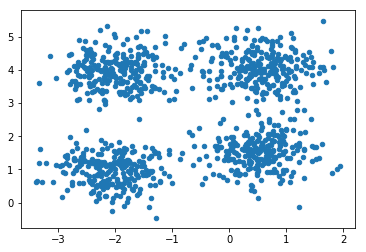

In [1]:
# This slide should be hidden as a sub slide during presentation
# Contains all of my imports and matplotlib rc changes
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X1 = np.random.normal([0.5,1.5], 0.5, size=(250,2)).tolist()
X2 = np.random.normal([0.5,4], 0.5, size=(250,2)).tolist()
X3 = np.random.normal([-2,1], 0.5, size=(250,2)).tolist()
X4 = np.random.normal([-2,4], 0.5, size=(250,2)).tolist()
X = np.asarray(X1+X2+X3+X4)

plt.scatter(X[:,0], X[:,1], s=20)

## Clustering 
---

In their most basic form, clustering algorithms take in unlabeled data and organize it into clusters. 
Objects in clusters are similar to objects in the same cluster and dissimilar to objects in other clusters.

Given a multivariate data set of points: 

 * Does the data have any structure in the form of concentrations or groupings of points?
 * Is there a way that we can partition the data into smaller groups according to some criteria?
 
If our data is a density estimate in bins over a large area:

 * Does our data have localized overdensities?

## Unsupervised Machine Learning
---

* Clustering algorithms are classified as "unsupervised machine learning".
* No prior information is required.
* The algorithm simply takes in the data and some hyperparameters and spits out an answer.
* Each algorithm has a different **true underlying function** that acts as a score or error for the analysis.

# A Smörgåsbord of Algorithms
---

![SKLearn Clustering Algorithms](images/kirby/SKLearnClusterAlgorithms.png)

## The Simplest Solution: $K$-Means
---

* The goal: Partition data into $k$ disjoint clusters, $C_k$, such that you minimize the sum of the squares in each cluster.
* Hyperparameters: The number of clusters, $k$


* Algorithm:
    1. Chose $k$ random data points for the cluster centroids.
    2. Assign each data point to the nearest centroid. 
        \begin{equation}
        C(x_i) = \mathrm{arg}\,\mathrm{min}_k ||x_i - \mu_k||
        \end{equation}
    3. Recompute the cluster centroids based on new membership: 
        \begin{equation}
        \mu_k = \frac{1}{N_k}\sum_{i\in C_k} x_i
        \end{equation}
    4. Repeat steps 2 and 3 until convergence.

## The Simplest Solution: $K$-Means
---

* Convergence:
    - No data points are reassigned.
    - No or extremely little change in centroids.
    - No or extremely little change in sum-of-square errors.

$$\sum_{k=1}^{K} \sum_{i\in C_k} || x_i - \mu_k ||^2$$

* Additional Details:
    - We are assuming that the clusters are spherical.
    - Every step in the algorithm results in a lower sum-of-square errorr.
    - Not guaranteed to find the global best fit.

# $K$-Means Example
---

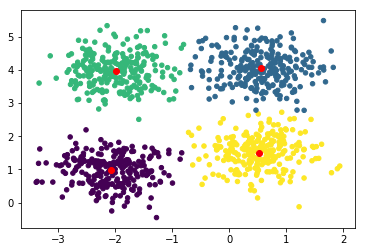

In [2]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 4)
clf.fit(X)

centers = clf.cluster_centers_
labels = clf.predict(X)

plt.scatter(X[:,0], X[:,1], s=20, c=labels)
plt.plot(centers[:,0], centers[:,1], 'ro')

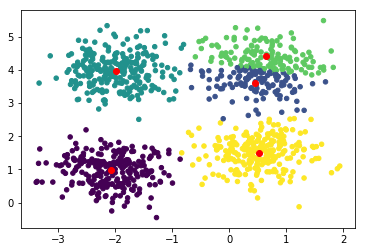

In [3]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 5)
clf.fit(X)

centers = clf.cluster_centers_
labels = clf.predict(X)

plt.scatter(X[:,0], X[:,1], s=20, c=labels)
plt.plot(centers[:,0], centers[:,1], 'ro')

[Source](http://shabal.in/visuals.html)
![img](images/kirby/kmeans_animations.gif)

# Nonparametric Density Estimation
---

- Goal: Associate each data point with the closest mode (peak) in a KDE.
- Hyperparameters: Kernel bandwidth, $h$, and gradient ascent step size, $a$.
- Update Scheme:

\begin{eqnarray}
x_i^{m+1} & = & x_i^m + a \nabla\log\, {f}^m (x_i^m) \\
& = & x_i^m + \frac{a}{f^m(x_i^m)}\nabla f^m(x_i^m)
\end{eqnarray}

- Algorithm:
    1. Make a copy of your data points, $\{x_i^{m=0}\}$
    2. For the set of points $\{x_i^{m}\}$, calculate the KDE.
    3. Update each of your points to $\{x_i^{m+1}\}$ using the update scheme above.
    4. Calculate the KDE of $\{x_i^{m+1}\}$.
    5. Repeat steps 3 and 4 until convergence.


# Nonparametric Density Estimation: Mean Shift
---

A popular kernel choice is the Epanechnikov kernel

\begin{equation}
K(u) = \frac{3}{4}\left(1-\frac{u^2}{h^2}\right) \;\;\;\;\; |u| \leq 1
\end{equation}

We also select $a$ such that

\begin{equation}
a = \frac{h^2}{D+2}
\end{equation}

The update scheme then becomes

\begin{equation}
x_i^{m+1} = \mathrm{mean\;position\;of\;points\;within\;a\;distance}\; h\; \mathrm{of}\; x_i^m
\end{equation}

# Mean Shift Example
---

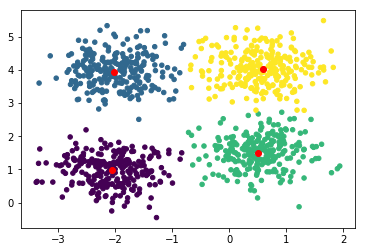

In [4]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=1.0)
ms.fit(X)

centers = ms.cluster_centers_
labels = ms.labels_

plt.scatter(X[:,0], X[:,1], s=20, c=labels)
plt.plot(centers[:,0], centers[:,1], 'ro')

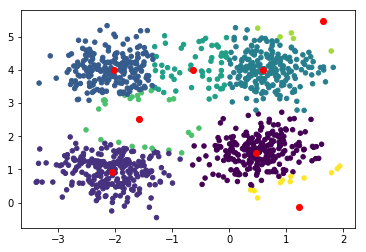

In [5]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=0.5)
ms.fit(X)

centers = ms.cluster_centers_
labels = ms.labels_

plt.scatter(X[:,0], X[:,1], s=20, c=labels)
plt.plot(centers[:,0], centers[:,1], 'ro')

[Source](https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/)
![img](images/kirby/mean_shift_points.png)

![img](images/kirby/example_contour_bw_2.png)

![img](images/kirby/ms_2d_bw_2.gif)

# Clustering Procedurally: Hierarchical Clustering
---

- The method is not formally related to the underlying density.
- No need to specify the number of clusters and can find clusters on all scales.
- Hyperparameters: How to cut graph edges, minimum cluster size **OR** number of clusters.


- Algorithm:
    1. Begin by partitioning the data into $N$ clusters, one for each point in the dataset.
    2. Find the two clusters that are closest together and merge them, resulting in $N-1$ clusters.
    3. Continue step 2 until you have a single cluster.
    4. Choose a maximum edge length and delete all connections over that threshold. 
       Remaining connected objects are clusters.

# Hierarchical Clustering
---

We get to chose how we find the closest clusters.

\begin{eqnarray}
\longrightarrow d_{min}(C_k, C_{k'}) & = & \min_{x\in C_k,\;x'\in C_{k'}} || x - x' ||  \\
d_{max}(C_k, C_{k'}) & = & \max_{x\in C_k,\;x'\in C_{k'}} || x - x' || \\
d_{avg}(C_k, C_{k'}) & = & \frac{1}{N_kN_{k'}} \sum_{x\in C_k}\sum_{x'\in C_{k'}} || x - x' || \\
d_{cen}(C_k, C_{k'}) & = & ||\mu_k - \mu_{k'}||
\end{eqnarray}



# Minimal Spanning Tree Example
---

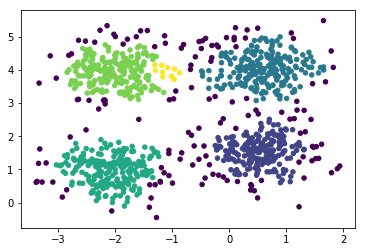

In [6]:
from astroML.clustering import HierarchicalClustering, get_graph_segments

n_neighbors = 10 # 
edge_cutoff = 0.9 # Keep the 90% of edges that are shortest
cluster_cutoff = 10 # Clusters with less than 10 points can be ignored

model = HierarchicalClustering(n_neighbors=n_neighbors,
                               edge_cutoff=edge_cutoff,
                               min_cluster_size=cluster_cutoff)
model.fit(X)

n_components = model.n_components_
labels = model.labels_
plt.scatter(X[:,0], X[:,1], s=20, c=labels)

In [7]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from scipy import sparse

from astroML.clustering import HierarchicalClustering, get_graph_segments
from astroML.datasets import fetch_great_wall

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=20, usetex=False)

#------------------------------------------------------------
# get data
X = fetch_great_wall()

xmin, xmax = (-375, -175)
ymin, ymax = (-300, 200)

#------------------------------------------------------------
# Compute the MST clustering model
n_neighbors = 10
edge_cutoff = 0.9
cluster_cutoff = 10
model = HierarchicalClustering(n_neighbors=10,
                               edge_cutoff=edge_cutoff,
                               min_cluster_size=cluster_cutoff)
model.fit(X)
print " scale: %2g Mpc" % np.percentile(model.full_tree_.data,
                                        100 * edge_cutoff)

n_components = model.n_components_
labels = model.labels_

#------------------------------------------------------------
# Get the x, y coordinates of the beginning and end of each line segment
T_x, T_y = get_graph_segments(model.X_train_,
                              model.full_tree_)
T_trunc_x, T_trunc_y = get_graph_segments(model.X_train_,
                                          model.cluster_graph_)

 scale: 3.5495 Mpc


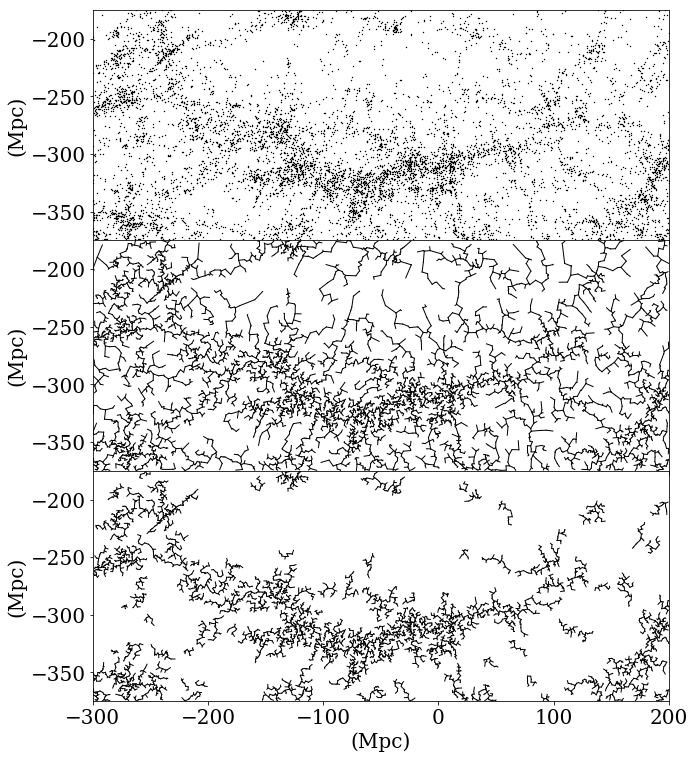

In [8]:
#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 12))
fig.subplots_adjust(hspace=0, left=0.1, right=0.95, bottom=0.1, top=0.9)

ax = fig.add_subplot(311, aspect='equal')
ax.scatter(X[:, 1], X[:, 0], s=2, lw=0, c='k')
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('(Mpc)', fontsize=20)

ax = fig.add_subplot(312, aspect='equal')
ax.plot(T_y, T_x, c='k', lw=1)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('(Mpc)', fontsize=20)

ax = fig.add_subplot(313, aspect='equal')
ax.plot(T_trunc_y, T_trunc_x, c='k', lw=1)

ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
ax.set_xlabel('(Mpc)', fontsize=20)
ax.set_ylabel('(Mpc)', fontsize=20)

plt.show()

# Algorithm Comparison
---


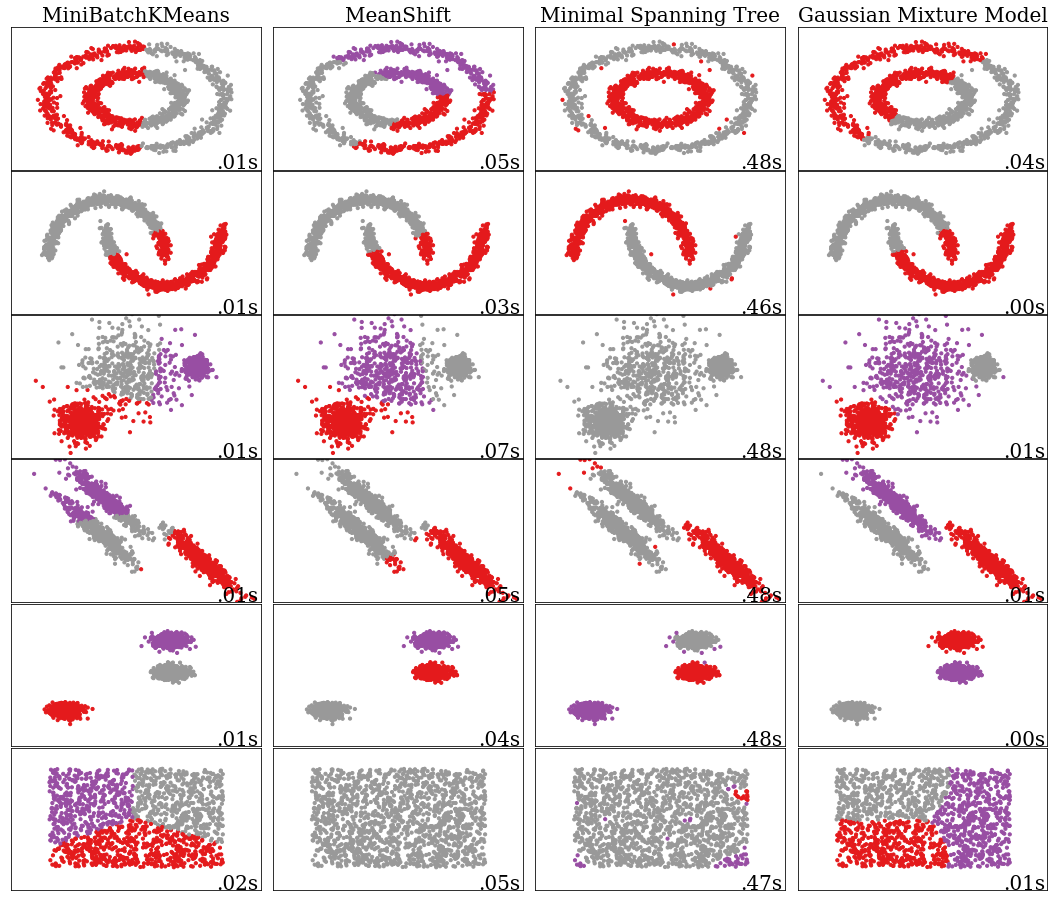

In [9]:
import time
#import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from astroML.clustering import HierarchicalClustering, get_graph_segments

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(6 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'n_neighbors': n_samples-1,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18}),
    (aniso, {'eps': .15}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    mst = HierarchicalClustering(n_neighbors=params['n_neighbors'],
                               edge_cutoff=.99,
                               min_cluster_size=10)
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')
    
    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('MeanShift', ms),
        ('Minimal Spanning Tree', mst),
        ('Gaussian Mixture Model', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=20)

        colors = np.array(list(islice(cycle(['#999999', '#e41a1c', '#984ea3',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=20,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

# Correlation Functions
---

- Used extensively in astrophysics to test models of structure formation and evolution.
- We can measure any structure at all scales compared to a random distribution.

\begin{equation}
dP_{12} = \bar{\rho}^2dV_1dV_2 \left(1+\xi(r)\right)
\end{equation}

- The probability of finding an object in a volume element $dV_1$ is proportional to the density $\rho$.
- The probability of finding an object in a volume element $dV_1$ AND another object in volume element $dV_2$ is given in the above equation.


- In other words, $\xi(r)$ is the excess probability of finding a pair of points, as a function of separation, compared to a random distribution and is called the *two-point correlation function*.

# Correlation Functions
---

$\xi(r) > 0$: Data is correlated at that scale.

$\xi(r) = 0$: Data is uncorrelated at that scale.

$\xi(r) < 0$: Data is anticorrelated at that scale.

$\xi(r)$ is related to the power spectrum, $P(k)$, by a Fourier Transform.

\begin{equation}
\xi(r) = \frac{1}{2\pi^2} \int dk\,k^2\,P(k)\,\frac{\sin(kr)}{kr}
\end{equation}

Therefore we can relate $\xi(r)$ directly to density fluctuations in sources.

\begin{equation}
\xi(r) = \left< \frac{\rho(x) - \bar{\rho}}{\bar{\rho}} \frac{\rho(x+r) - \bar{\rho}}{\bar{\rho}} \right> = \left< \delta(x)\,\delta(x+r) \right>
\end{equation}

# Computing 2-pt Correlation Functions
---

- We need a random distribution of points that are generated with the same selection function as the data
    - i.e. Identical mask and volume
    - The randoms should represent a Monte Carlo integration of the window function
    - Many more points (book quotes 20x) than the data to eliminate any contribution to the variance on the 
      measurement.
- Compute the number of pairs between $r$ and $r+dr$.
- The correlation function can then be estimated simply by calculating the excess or deficit over random.

\begin{equation}
\hat{\xi}(r) = \frac{DD(r) - RR(r)}{RR(r)}
\end{equation}

- However, irregular surface geometries can introduce a bias. The [Landy-Szalay estimator](http://adsabs.harvard.edu/abs/1993ApJ...412...64L) does a much better job at eliminating these effects and giving a less biased estimate.

\begin{equation}
\hat{\xi}(r) = \frac{DD(r) - 2DR(r) + RR(r)}{RR(r)}
\end{equation}

# 3-pt Correlation Functions
---

- We can also count the number of triangles of specific sizes on the sky.
- For triangle of arbitrary size, the 3-pt correlation function, $\zeta(r_{12}, r_{23}, r_{13})$, can be written as

\begin{equation}
dP_{123} = \bar{\rho}^3 dV_1dV_2dV_3(1+ \xi(r_{12}) + \xi(r_{23}) + \xi(r_{13}) + \zeta(r_{12}, r_{23}, r_{13}))
\end{equation}

- We can estimate it by extending the Landy-Szalay estimator to an **equilateral** triangle only configuration.

\begin{equation}
\hat{\zeta}(r) = \frac{DDD(r) - 3DDR(r) + DRR(r) - RRR(r)}{RRR(r)}
\end{equation}

## SDSS BOSS DR12 Angular 2-pt Correlation Functions
---
[Source](https://arxiv.org/abs/1607.03147)

![img](images/kirby/arxiv1607.03147.png)